# Plotting Images
Producing quality images for reports.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec

## Parameter vs. frequency
Visualize quaduatic parameters of the 2nd stage of DLS method over different frequency for run 8&9, 10, and 11.

### Initialization

In [187]:
first_pathname = './Data/DLS-w_s/'
last_pathname = {'run8&9': 'run8&9'}

pathname_dict = {'run8&9': './Data/DLS-w_s/run8&9/w_s_list_2/',
                 'run10': './Data/DLS-w_s/run10/w_s_list_2/',
                 'run11': './Data/DLS-w_s/run11/w_s_list_2/',}

co_value_filename = 'SME_coefficients_value.txt'
co_sigma_filename = 'SME_coefficients_sigma.txt'
par_value_filename = 'DLS2_parameters_value.txt'
par_sigma_filename = 'DLS2_parameters_sigma.txt'
w_s_list_filename = 'w_s_list.txt'

### Parameter index table
|Coefficient|$S_{C,0}$|$S_{S,\omega_s}$|$S_{C,\omega_s}$|$S_{S,2\omega_s}$|$S_{C,2\omega_s}$|$C_{C,0}$|$C_{S,\omega_s}$|$C_{C,\omega_s}$|$C_{S,2\omega_s}$|$C_{C,2\omega_s}$|
|:-:|
|*index*|0|1|2|3|4|5|6|7|8|9|

In [179]:
index = 3
par_dict = {'0': 'S_c_0', '1': 'S_s_ws','2': 'S_c_ws','3': 'S_s_2ws','4': 'S_c_2ws',
           '5': 'C_c_0', '6': 'C_s_ws','7': 'C_c_ws','8': 'C_s_2ws','9': 'C_c_2ws'}  # for selecting coefficient in another dictionary
par_index = par_dict[str(index)]
ylabel_dict = {'0': '$S_{c,0}$', '1': '$S_{s,\omega}$','2': '$S_{c,\omega}$','3': '$S_{s,2\omega}$','4': '$S_{c,2\omega}$',
           '5': '$C_{c,0}$', '6': '$C_{s,\omega}$','7': '$C_{c,\omega}$','8': '$C_{s,2\omega}$','9': '$C_{c,2\omega}$'}  # for displaying on y label
par_ylabel = ylabel_dict[str(index)]

### Reading files

In [180]:
# for storing parameters for all runs
par_value_dict = {}
par_sigma_dict = {}

for name, pathname in pathname_dict.items():

    # read parameters
    par_values_df = pd.read_csv(pathname + par_value_filename, index_col='Index')
    par_sigmas_df = pd.read_csv(pathname + par_sigma_filename, index_col='Index')
    
    # choose one parameter
    par_value = par_values_df[par_index].values
    par_sigma = par_sigmas_df[par_index].values
    
    # store the parameter in dictionary
    par_value_dict[name] = par_value
    par_sigma_dict[name] = par_sigma
    
    # same for every run
    w_s_list_df = pd.read_csv(pathname + w_s_list_filename, index_col='Index')
    w_s_list = w_s_list_df.values
    N_w = len(w_s_list)



### Plotting

#### Together

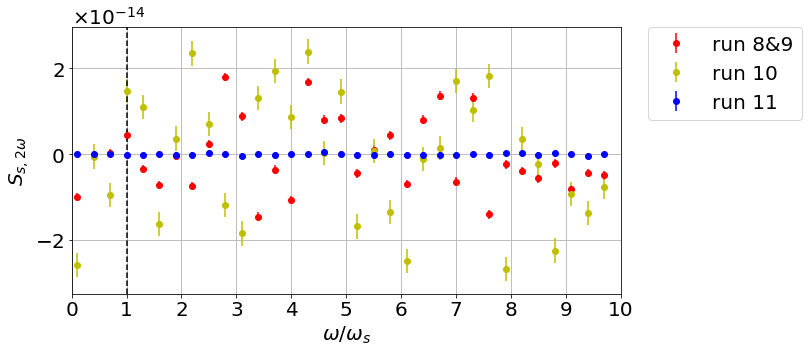

In [181]:
fig, ax = plt.subplots(figsize=(9,5))
ax.errorbar(w_s_list, par_value_dict['run8&9'], yerr=par_sigma_dict['run8&9'], fmt='o', label='run 8&9', color='r')
ax.errorbar(w_s_list, par_value_dict['run10'], yerr=par_sigma_dict['run10'], fmt='o', label='run 10', color='y')
ax.errorbar(w_s_list, par_value_dict['run11'], yerr=par_sigma_dict['run11'], fmt='o', label='run 11', color='b')
ax.set_xlabel(r'$\omega / \omega_s$', fontsize=20)
ax.set_ylabel(par_ylabel, fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xlim([0,10])

# changing the format of the offset
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax.yaxis.get_offset_text()
t.set_size(20)

# add line
ax.axvline(1, linestyle='--', color='k')  # verticle line for w = w_s
#ax.axhline(0, linestyle='--', color='k')  # horizontal line for 0

# set legend
lgd = ax.legend(fontsize=20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(np.arange(0, 11, 1.0))
plt.tight_layout()
plt.grid() 


# save figure
fig.savefig('./Images/compareRuns.eps', fmt='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('./Images/compareRuns.png', fmt='png', bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

#### Seperate

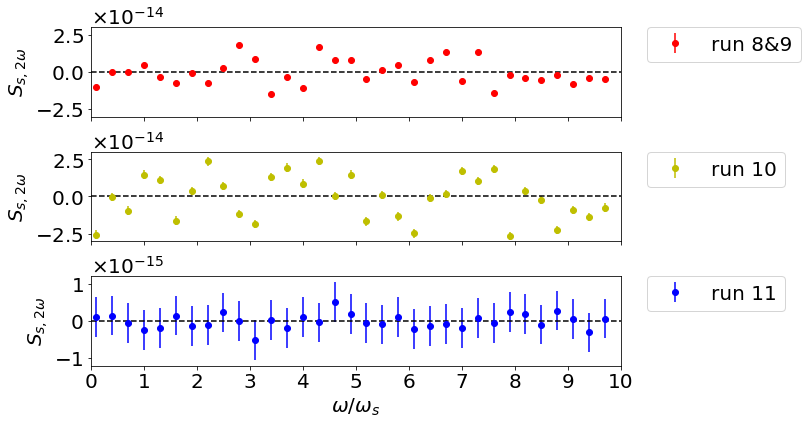

In [182]:
lgd = [None] * 3

fig, ax = plt.subplots(3,1,figsize=(9,6), sharex=True)

# specified properties
ax[0].errorbar(w_s_list, par_value_dict['run8&9'], yerr=par_sigma_dict['run8&9'], fmt='o', label='run 8&9', color='r')
ax[0].set_ylim([-3e-14, 3e-14])
ax[1].set_ylim([-3e-14, 3e-14])
ax[2].set_ylim([-1.2e-15, 1.2e-15])

ax[1].errorbar(w_s_list, par_value_dict['run10'], yerr=par_sigma_dict['run10'], fmt='o', label='run 10', color='y')
ax[2].errorbar(w_s_list, par_value_dict['run11'], yerr=par_sigma_dict['run11'], fmt='o', label='run 11', color='b')
ax[2].set_xlabel(r'$\omega / \omega_s$', fontsize=20)

# general properties
for i in range(3):
    ax[i].set_ylabel(par_ylabel, fontsize=20)
    ax[i].tick_params(labelsize=20)
    ax[i].set_xlim([0,10])
    ax[i].axhline(0, linestyle='--', color='k')  # horizontal line for 0
    lgd[i] = ax[i].legend(fontsize=20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # changing the format of the offset
    ax[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
    t = ax[i].yaxis.get_offset_text()
    t.set_size(20)

plt.xticks(np.arange(0, 11, 1.0))
plt.tight_layout()

# save figure
fig.savefig('./Images/compareRunsSubplots.eps', fmt='eps', bbox_extra_artists=lgd, bbox_inches='tight')
fig.savefig('./Images/compareRunsSubplots.png', fmt='png', bbox_extra_artists=lgd, bbox_inches='tight')

plt.show()

#### Combine two together

In [3]:
f = plt.figure(figsize=(9,6))
gs = gridspec.GridSpec(6, 1)
ax1 = plt.subplot(gs[:4, 0])
ax2 = plt.subplot(gs[4:6,0])

# plot ax1
ax1.errorbar(w_s_list, par_value_dict['run8&9'], yerr=par_sigma_dict['run8&9'], fmt='o', label='run 8&9', color='r')
ax1.errorbar(w_s_list, par_value_dict['run10'], yerr=par_sigma_dict['run10'], fmt='o', label='run 10', color='y')
ax1.errorbar(w_s_list, par_value_dict['run11'], yerr=par_sigma_dict['run11'], fmt='o', label='run 11', color='b')
ax1.set_ylabel(par_ylabel, fontsize=20)
ax1.tick_params(labelsize=20)
ax1.set_xlim([0,10])
# changing the format of the offset
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax1.yaxis.get_offset_text()
t.set_size(20)
# add line
ax1.axvline(1, linestyle='--', color='k')  # verticle line for w = w_s
#ax.axhline(0, linestyle='--', color='k')  # horizontal line for 0
lgd1 = ax1.legend(fontsize=20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # set legend
ax1.set_xticks(np.arange(0, 11, 1.0))
plt.tight_layout()
ax1.grid() 
ax1.set_xticklabels([])

# plot ax2
ax2.errorbar(w_s_list, par_value_dict['run11'], yerr=par_sigma_dict['run11'], fmt='o', label='run 11', color='b')
ax2.set_xlabel(r'$\omega / \omega_s$', fontsize=20)
ax2.set_ylabel(par_ylabel, fontsize=20)
ax2.tick_params(labelsize=20)
ax2.set_xlim([0,10])
ax2.axhline(0, linestyle='--', color='k')  # horizontal line for 0
lgd2 = ax2.legend(fontsize=20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# changing the format of the offset
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax2.yaxis.get_offset_text()
t.set_size(20)
ax2.set_xticks(np.arange(0, 11, 1.0))


# save figure
f.savefig('./Images/compareRuns.eps', fmt='eps', bbox_extra_artists=[lgd1, lgd2], bbox_inches='tight')
f.savefig('./Images/compareRuns.png', fmt='png', bbox_extra_artists=[lgd1, lgd2], bbox_inches='tight')

plt.show()

NameError: name 'plt' is not defined

## DLS1 parameter
for run 11

### Initalization

In [4]:
# reading DLS1 data (python)
location_py = './Data/DLS1/run11/N_r_1000/DLS1_data.txt'
params_df = pd.read_csv(location_py)
# obtainging parameters
t_m = params_df['time']
# choose beta 3, 4 and sigma 3, 4
beta_3 = params_df['beta_3']
beta_4 = params_df['beta_4']
sigma_beta_3 = params_df['sigma_3']
sigma_beta_4 = params_df['sigma_4']

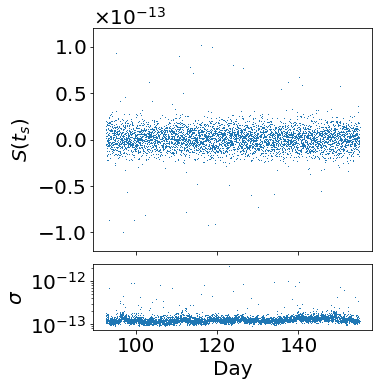

In [9]:
# visualize beta 3 and 4
day = t_m / 60 / 60 / 24
plt.rcParams['axes.formatter.limits']=(-6,6)  # set the limit for the y axis offset

# create figure
fig = plt.figure(figsize= (5,7))
ax1 = plt.subplot2grid((5, 4), (0, 0), colspan=4, rowspan=3)
ax3 = plt.subplot2grid((5, 4), (3, 0), colspan=4, rowspan=1)


# generating each subplot
ax1.plot(day, beta_3, ',')
#ax1.plot(day, beta_4, ',', label='$C(t)$')
ax1.set_ylim([-1.2e-13,1.2e-13])
ax1.set_ylabel('$S(t_s)$', fontsize=20)
ax1.tick_params(labelsize=20)
ax1.set_xticklabels([])
#ax1.legend(fontsize=20)
# changing the format of the offset
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax1.yaxis.get_offset_text()
t.set_size(20)

ax3.semilogy(day, sigma_beta_3, ',')
ax3.set_xlabel('Day', fontsize=20)
ax3.set_ylabel(r'$\sigma$', fontsize=20)
ax3.tick_params(labelsize=20)



plt.savefig('Images/DLS1_result.png', formate='png',
            bbox_inches='tight')
plt.savefig('Images/DLS1_result.eps', formate='eps',bbox_inches='tight')

plt.show()

## Optimzation Images
plotting the sigma over N_r for run 8&9 and run 10.

### Initialization

In [10]:
index = 4
co_dict = {'0': 'c_T_Q', '1': 'c_T_X','2': 'c_T_Y','3': 'c_T_Z','4': 'c_T_M','5': 'c_T_u'}  # for selecting coefficient in another dictionary
co_index = co_dict[str(index)]
ylabel_dict = {'0': '$c^T_Q$', '1': '$c^T_X$','2': '$c^T_Y$','3': '$c^T_Z$','4': '$c^T_M$','5': '$c^T_\_$'}  # for displaying on y label
co_ylabel = ylabel_dict[str(index)]

# for storing the data from two runs
co_value = {}
co_sigma = {}
rot_list = {}

# creating location dictionary
location_dict = {'run8&9': './Data/DLS_Optimization/Archive/run8&9/', 'run11': './Data/DLS_Optimization/Archive/run11/'}

### Reading Data

In [11]:
for key, value in location_dict.items():

    # initialization location
    location = value
    params_filename = 'parameters.txt'
    values_filename = 'EMScoefficientValues.txt'
    sigmas_filename = 'EMScoefficientSigmas.txt'

    # read parameters
    params_df = pd.read_csv(location + params_filename, index_col='Index')
    rot_list[key] = params_df['N_r']
    T = params_df['Time (s)']

    # read value and sigmas as dictionary
    values_df = pd.read_csv(location + values_filename, index_col = 'Index')
    sigmas_df = pd.read_csv(location + sigmas_filename, index_col = 'Index')

    # number of samples
    N = len(rot_list)

    # reading 
    co_value[key] = values_df[co_index].values
    co_sigma[key] = sigmas_df[co_index].values

### Plotting

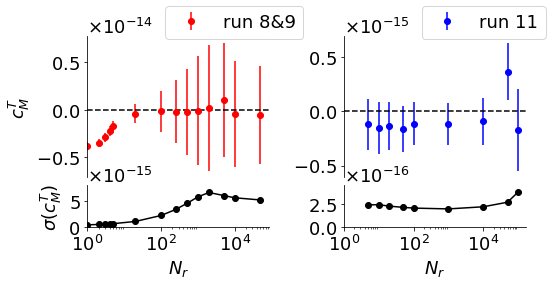

In [25]:
fig = plt.figure(figsize= (9,3.5))
ax1 = plt.subplot2grid((4, 8), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 8), (0, 4), colspan=3, rowspan=3)
ax3 = plt.subplot2grid((4, 8), (3, 0), colspan=3, rowspan=1)
ax4 = plt.subplot2grid((4, 8), (3, 4), colspan=3, rowspan=1)

# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,15), sharex=True)  # creating the figure object


# generating each subplot
ax1.set_xscale("log", nonposx='clip')
ax1.errorbar(rot_list['run8&9'], co_value['run8&9'], yerr=co_sigma['run8&9'], fmt='o', color='r', label='run 8&9')
ax1.axhline(0, linestyle='--',color='black')
ldg1 = ax1.legend(fontsize=18, loc=3, bbox_to_anchor=(0.38, 0.92))
ax1.set_ylabel(co_ylabel, fontsize=18)
ax1.tick_params(labelsize=18)
ax1.set_xlim(left=1)
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # changing the format of the offset
t = ax1.yaxis.get_offset_text()
t.set_size(18)
ax1.spines['top'].set_visible(False)  # remove frame
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off


ax2.set_xscale("log", nonposx='clip')
ax2.errorbar(rot_list['run11'], co_value['run11'], yerr=co_sigma['run11'], fmt='o', color='b', label='run 11')
ldg2 = ax2.axhline(0, linestyle='--',color='black')
ax2.legend(fontsize=18, loc=3, bbox_to_anchor=(0.38, 0.92))
#ax2.set_ylabel(co_ylabel, fontsize=18)
ax2.tick_params(labelsize=18)
ax2.set_xlim(left=1)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # changing the format of the offset
t = ax2.yaxis.get_offset_text()
t.set_size(18)
ax2.spines['top'].set_visible(False)  # remove frame
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off


ax3.semilogx(rot_list['run8&9'], co_sigma['run8&9'], '-o', color='k')
ax3.set_xlabel('$N_r$', fontsize=18)
ax3.set_ylabel('$\sigma$('+co_ylabel+')', fontsize=18)
ax3.set_xlim(left=1)
ax3.set_ylim([0,8e-15])
ax3.tick_params(labelsize=18)
ax3.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # changing the format of the offset
t = ax3.yaxis.get_offset_text()
t.set_size(18)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax4.semilogx(rot_list['run11'], co_sigma['run11'], '-o', color='k')
ax4.set_xlabel('$N_r$', fontsize=18)
#ax4.set_ylabel('$\sigma$('+co_ylabel+')', fontsize=18)
ax4.set_xlim(left=1)
ax4.set_ylim([0,4.5e-16])
ax4.tick_params(labelsize=18)
ax4.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # changing the format of the offset
t = ax4.yaxis.get_offset_text()
t.set_size(18)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# save figure
#fig.savefig('./Images/compareRuns.eps', fmt='eps', bbox_extra_artists=[lgd1, lgd2], bbox_inches='tight')
#fig.savefig('./Images/compareRuns.png', fmt='png', bbox_extra_artists=[lgd1, lgd2], bbox_inches='tight')

fig.savefig('./Images/Optimization.eps', fmt='eps', bbox_inches='tight')
fig.savefig('./Images/Optimization.png', fmt='png', bbox_inches='tight')

plt.show()